### Artificial Neural Network 

#### importing the standard libraries: 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Extracting the dataset: 
df = pd.read_csv('Churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


#### EDA : 

In [3]:
# 1) Shape of the dataset: 
df.shape

(10000, 14)

In [4]:
# 2) Dropping unwanted columns: 
df = df.drop(columns=['RowNumber','CustomerId','Surname'])

In [5]:
df.shape

(10000, 11)

In [6]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [7]:
# 3) Converting categorical data into dummy variables: 
df = pd.get_dummies(df)

In [8]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,1,0,0,1,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,0,1,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,1,0,0,1,0
3,699,39,1,0.00,2,0,0,93826.63,0,1,0,0,1,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,0,1,1,0


In [10]:
# 4) Escaping the dummy variable trap: 
df = df.drop(columns=['Geography_France','Gender_Female'])

In [11]:
# Verifying the dataset: 
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


In [12]:
# Defining x and y
# x : Independent data
# y : Depedent data
x = df.copy()
x = x.drop(columns = ['Exited'])
x.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0


In [13]:
# y: 
y = df['Exited'].values
y

array([1, 0, 1, ..., 1, 1, 0], dtype=int64)

#### Visualizing out data: 

In [90]:
df.shape

(10000, 12)

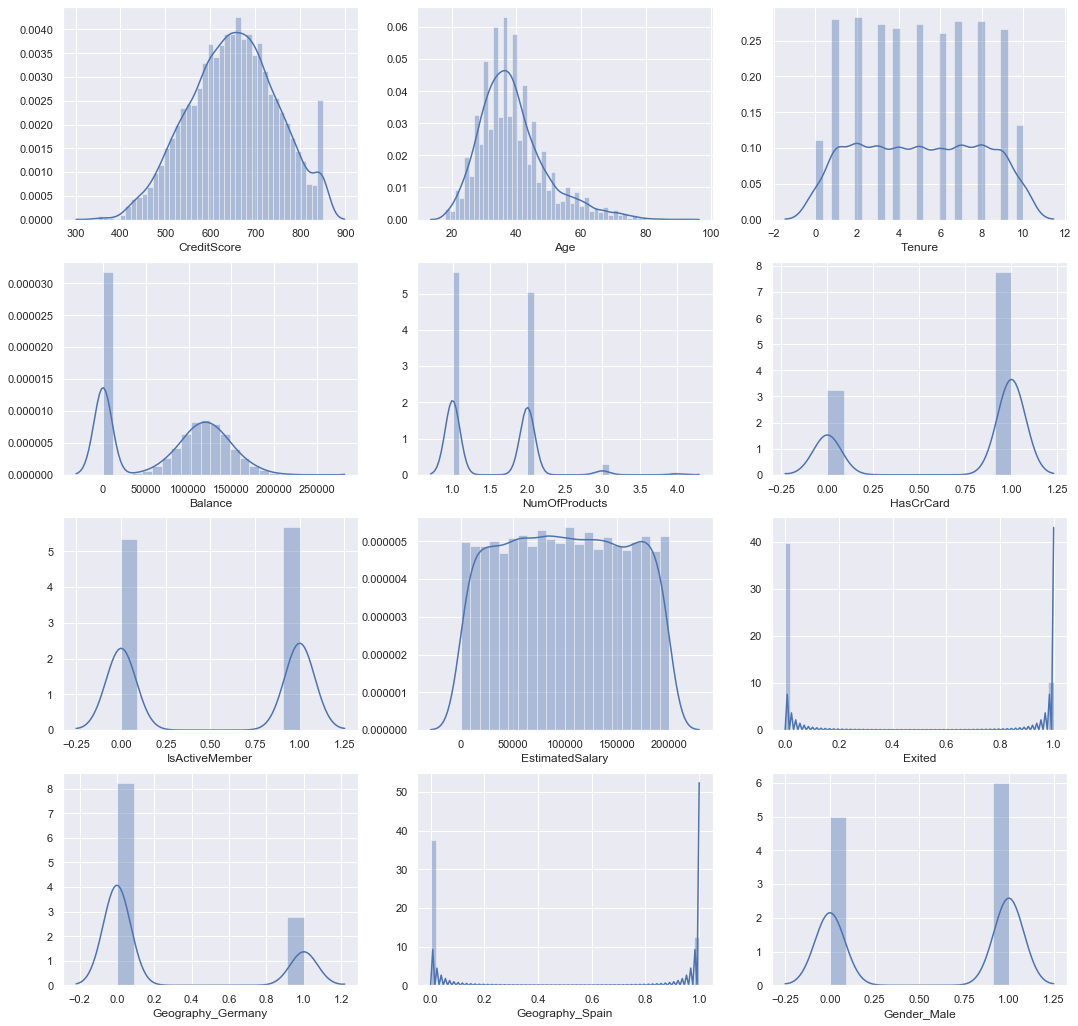

In [89]:
sns.set(font_scale=1)
f, axes = plt.subplots(4,3, figsize = (18,18))
col = 0
for i in range(0,4):
    for j in range(0,3):
        if col < 12:
            sns.distplot(df.iloc[:,col], ax = axes[i][j])
            col = col + 1
plt.show()

#### The correlation plot: 


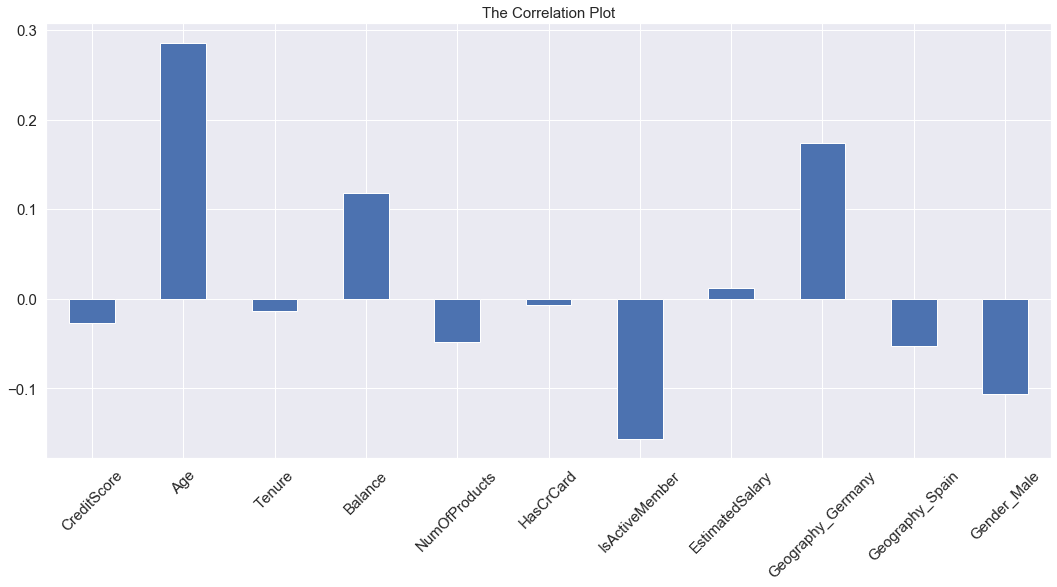

In [34]:
plt.figure(figsize = (18,8))
x.corrwith(df['Exited']).plot.bar(rot = 45)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.title('The Correlation Plot', fontsize = 15)
plt.show()

#### Plotting the correlation matrix: 

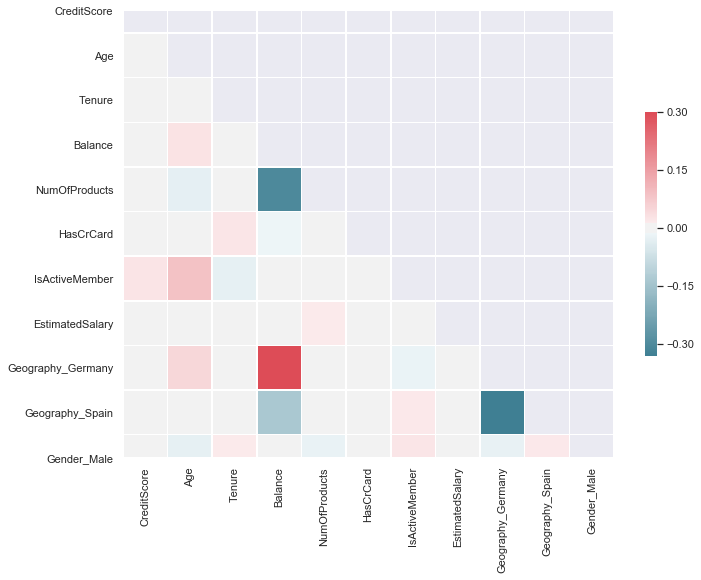

In [92]:
# Compute the correlation matrix
corr = x.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.show()

### Preparing the model: 

In [48]:
# Splitting the dataset: 
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 42)

In [49]:
# Preprocessing the dataset: 
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

### Building the ANN: 

In [37]:
# Importing the required libraries: 
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

In [79]:
def ann_model():
    # Building the model: 
    # Initializing the model: 
    model = Sequential()
    # Adding the input layer: 
    model.add(Dense(units = 8, activation = 'relu', input_dim = 11))
    # Adding the first hidden layer: 
    model.add(Dense(units = 8, activation = 'relu'))
    model.add(Dropout(0.2))
    # Adding the second hidden layer: 
    model.add(Dense(units = 8, activation = 'relu'))
    model.add(Dropout(0.2))
    # Adding the thrid hidden layer: 
    model.add(Dense(units = 8, activation = 'relu'))
    model.add(Dropout(0.2))
    
    # Adding the output layer: 
    model.add(Dense(units = 1, activation = 'sigmoid'))
    
    # Defining the backward propagation: 
    model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
    return model

In [80]:
# Creating a classifier: 
classifer = ann_model()

In [81]:
# Fitting the model: 
classifer.fit(x_train, y_train, epochs=100, batch_size=10)

Epoch 1/100
8000/8000 [==============================] - 1s 172us/step - loss: 0.5267 - accuracy: 0.7778
Epoch 2/100
8000/8000 [==============================] - 1s 120us/step - loss: 0.4715 - accuracy: 0.79850s - l
Epoch 3/100
8000/8000 [==============================] - 1s 119us/step - loss: 0.4424 - accuracy: 0.8095
Epoch 4/100
8000/8000 [==============================] - 1s 121us/step - loss: 0.4242 - accuracy: 0.81500s - loss: 0.4307 - ac
Epoch 5/100
8000/8000 [==============================] - 1s 120us/step - loss: 0.4024 - accuracy: 0.8289
Epoch 6/100
8000/8000 [==============================] - 1s 121us/step - loss: 0.3959 - accuracy: 0.83170s - loss: 0.4049 - accu
Epoch 7/100
8000/8000 [==============================] - 1s 120us/step - loss: 0.3862 - accuracy: 0.8378
Epoch 8/100
8000/8000 [==============================] - 1s 123us/step - loss: 0.3769 - accuracy: 0.84440s - loss: 0.3
Epoch 9/100
8000/8000 [==============================] - 1s 122us/step - loss: 0.3724 - accura

8000/8000 [==============================] - 1s 171us/step - loss: 0.3484 - accuracy: 0.8594
Epoch 78/100
8000/8000 [==============================] - 1s 168us/step - loss: 0.3496 - accuracy: 0.8565
Epoch 79/100
8000/8000 [==============================] - 1s 183us/step - loss: 0.3427 - accuracy: 0.8590
Epoch 80/100
8000/8000 [==============================] - 1s 174us/step - loss: 0.3413 - accuracy: 0.8600
Epoch 81/100
8000/8000 [==============================] - 1s 164us/step - loss: 0.3479 - accuracy: 0.8562
Epoch 82/100
8000/8000 [==============================] - 1s 163us/step - loss: 0.3458 - accuracy: 0.8600
Epoch 83/100
8000/8000 [==============================] - 1s 164us/step - loss: 0.3426 - accuracy: 0.8595
Epoch 84/100
8000/8000 [==============================] - 1s 164us/step - loss: 0.3461 - accuracy: 0.8590
Epoch 85/100
8000/8000 [==============================] - 1s 170us/step - loss: 0.3447 - accuracy: 0.8601
Epoch 86/100
8000/8000 [==============================] - 1

#### Making the predictions with the model:

In [82]:
# Making the predictions:
y_pred = classifer.predict_classes(x_test)

#### Validating our results: 

In [83]:
# Using the confusion martix: 
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Correct Predictions:', np.sum(np.diagonal(cm)))
print('Incorrect predicions:', x_test.shape[0] - np.sum(np.diagonal(cm)))
print('Accuracy:', str(round(accuracy_score(y_test, y_pred),4)*100)+'%')
print('Precision:', str(round(precision_score(y_test, y_pred),4)*100)+'%')

[[1557   50]
 [ 221  172]]
Correct Predictions: 1729
Incorrect predicions: 271
Accuracy: 86.45%
Precision: 77.48%


In [85]:
# Using K fold corss validation for check the accuracy: 
from sklearn.model_selection import cross_val_score
from keras.wrappers.scikit_learn import KerasClassifier
kfold_classifer = KerasClassifier(build_fn=ann_model, batch_size=10, nb_epoch=150,verbose=0)
kfold = cross_val_score(estimator=kfold_classifer, X = x_test, y = y_test, cv = 10)
print('10 Accuracies:', kfold, end = '\n\n')
print('Mean accuracy:', kfold.mean())

10 Accuracies: [0.80000001 0.80500001 0.77999997 0.82499999 0.83999997 0.80500001
 0.79500002 0.79000002 0.80500001 0.79500002]

Mean accuracy: 0.8040000021457672


In [86]:
# Result form KFold: 
print('Mean Accuracy:', str(round(kfold.mean(),4)*100)+'%')

Mean Accuracy: 80.4%
